# Ensemble

* toc : true
* branch: master
* badges: true
* comments: true
* author: 이강철
* categories: [R]
* published : true
* hide : false

## Bootstrap

`-` $n$개의 표본에서 샘플을 복원추출하는 방법

> example : $n$개의 표본에서 1번째 표본이 샘플로 채택되지 않을 확률

$$\lim_{n \to \infty}\left  (1-\frac{1}{n}\right)^{n} = e^{-1}\approx 0.367$$

***

## Bagging

### 이론

* 아이디어 : $B$개의 tree를 생성 후 앙상블한다.

`Step.1` : $n$개의 표본에서 $n$개의 샘플을 복원 추출 $\to L^{*(b)}\quad b=1\dots B$

`Step.2` : tree 적합 $\to f^{(b)}(x)$

`Step.3`: $B$개의 예측모형 결합 $\to \hat f(x) = \frac{1}{B} \sum_{b=1}^{B} f^{(b)}(x)$ 
    
    -  분류모형의 경우 : B개 중 가장 많이 분류된 범주로 분류
    

### 기대효과

* tree의 경우 가지치기를 하지않으면 과적합문제가 발생

* 배깅의 경우 $B$개의 tree를 생성 후 결과를 앙상블 하므로 예측모형의 분산감소 $\to$ 즉, 과적합을 막을 수 있음

* 배깅방법은 tree 뿐만 아니라 여러 예측모형을 앙상블해서 사용할 수 있음

* 단점 : 복원추출을 하여 모든 변수를 이용해 $f^{(b)}(x)$를 적합 시켰기 때문에 각각의 모형은 서로 독립이 보장되지 않는다.

### Out-of-Bag Error Estimation

* 앞서 설명하였듯이 각 개체가 Boostrap sample에 속하지 않을확률은 $e^{-1}\approx 0.367$이다.

* 즉, 각 개체는 $\frac {B}{3}$개의 트리에 포함되지 않는다.

* 이러한 데이터를 **Out-of-bag 관측값(OOB)**이라고 하며 이를 이용해 test error를 계산할수 있다.
    * 포함되지 않은 tree에 개체를 집어넣은 후 평균을 내서 OOB test error 산출

***

## Random Forest

### 이론

* boostrap sample + random sample of $m$ predictors

* 전체적인 방법은 배깅과 동일하나 각각의 $f^{(b)}(x)$에서 예측변수를 일부만 선택
    * 회귀 문제 : $m = p/3$
    * 분류 문제 : $m = \sqrt p$

* $f^{b}(x)$ 사이의 상관성을 줄이므로 분산의 감소를 일으킴 $\to$ 즉, 배깅보다 과적합을 더 잘 막음

* 많은 수의 트리를 생성하기 때문에 예측력을 향상시킬 수 있지만, 트리의 강점인 설명력이 사라진다.

* 대신, 변수의 중유도를 측정할 수 있음

### 변수중요도

`1` 정확도 감소

$$d_i = r_i-e_b$$

$$변수 중요도 = \frac{\bar {d_i}}{s_{d_i}}$$

$$s_{d_i}^2 = \frac {1}{B-1} \sum_{b=1}^{B}(d_{i}-\bar {d_i})^2$$

* $e_b$ : $b$번째 예측모형에서의 OOB error 측정
* $r_i$ : 임의의 변수 $X_i$를 석었을 때 OOB error 측정


`2`. 불순도 감소

* 트리 형성 과정에서 분리 규칙으로 사용된 변수들에 대해 $RSS$ 나 불순도가 얼마나 감소했는지를 측정 후 평균낸 값을 변수 중요도로 사용

***

## Boosting

### 이론

* 약한 예측 모형을 결합하여 매우 정확한 예측 모형을 만듬

* 배깅과의 차이점 $\to$ 배깅은 병렬, 부스팅은 순차적(직렬)으로 모형 결합

### 알고리즘

`1` 각 개체에 대해 초기 가중치 설정 : $w_i = \frac 1n, \,\, i = 1,2,3\dots n$

`2` 가중치 $w_i$를 이용하여 boostrap sample을 추출하여 분류모형 생성

`3` 오차율 계산 

$$e_b= \frac{\sum_{i=1}^{n} w_iI(y_i\neq f_{b}(x_i))}{\sum_{i=1}^{n} w_i}$$

$$\alpha_b =  \log \frac {1-e_b}{e_b} $$

`4` 가중치 갱신

$$ w_i \leftarrow w_i \times \exp \,\left (\alpha_b I(y_i\neq f_{b}(x_i))\right)$$

`5` 최종 모형 결정 : $f(x) = sign \left( \sum_{b=1}^{B} \alpha_b f_b(x) \right )$

    * sign(f(x)) >0 : class A
    
    * sign(f(x)) <0 : class B    

### 정리

* 배깅과 달리 예측력이 좋으나 과적합에 문제가 있음 $\to B$ 개수의 선택 중요 

* 약한 예측모형을 기본 모형으로 사용하기 때문에 하나의 부할을 갖는트리 (depth=2) 를 많이 사용함

***

## R실습

In [15]:
#install.packages(c("randomForest","ipred","gbm","xgboost","adabag","rpart","rpart.plot","data.table"))

In [17]:
library(randomForest) ##random Forest
library(ipred) ##bagging
library(gbm) ## Boosting
library(xgboost)  ## xgboost  
library(adabag)  ##Adaboosting : boosting
library(rpart)
library(rpart.plot)
library(tidyverse)
library(data.table)

In [13]:
library(MASS)
select <- dplyr::select

### tree 모형

In [39]:
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
Boston_train <- Boston[train,-1]
Boston_test <- Boston[-train,-1]

cart_boston<- rpart(medv ~ ., data=Boston_train)

cart_boston

n= 253 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 253 21715.9700 22.67668  
   2) rm< 6.676 199  6547.3640 19.29095  
     4) lstat>=14.91 77  1535.7650 14.54026  
       8) tax>=551.5 43   466.4065 11.92791 *
       9) tax< 551.5 34   404.7838 17.84412 *
     5) lstat< 14.91 122  2176.9560 22.28934  
      10) lstat>=9.89 63   321.4965 20.05397 *
      11) lstat< 9.89 59  1204.5070 24.67627  
        22) dis>=2.96955 51   307.4016 23.87255 *
        23) dis< 2.96955 8   654.1400 29.80000 *
   3) rm>=6.676 54  4480.9340 35.15370  
     6) rm< 7.435 39  2005.1790 31.27179  
      12) lstat>=8.76 9   357.9422 23.75556 *
      13) lstat< 8.76 30   986.2587 33.52667  
        26) lstat>=4.6 22   254.1436 31.47273 *
        27) lstat< 4.6 8   384.0750 39.17500 *
     7) rm>=7.435 15   360.0373 45.24667 *

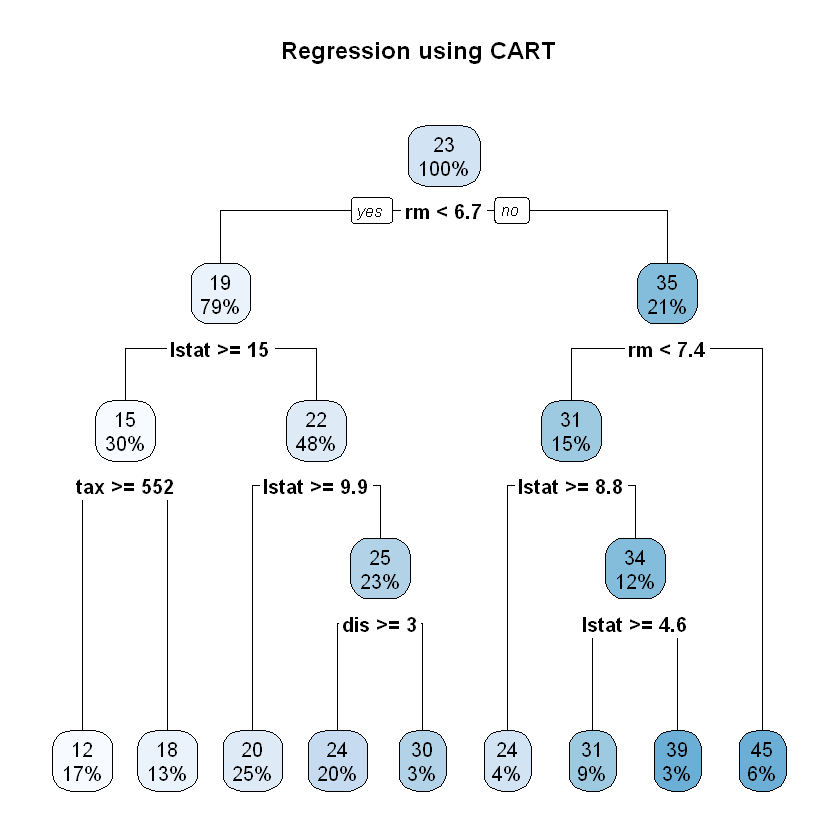

In [40]:
rpart.plot(cart_boston, 
           main = "Regression using CART")

In [41]:
summary(cart_boston)

Call:
rpart(formula = medv ~ ., data = Boston_train)
  n= 253 

          CP nsplit rel error    xerror       xstd
1 0.49215730      0 1.0000000 1.0144534 0.11691897
2 0.13053260      1 0.5078427 0.6066988 0.07865966
3 0.09742681      2 0.3773101 0.4638606 0.06743349
4 0.03060304      3 0.2798833 0.3369510 0.05919318
5 0.03043742      4 0.2492802 0.3172014 0.05609988
6 0.02997576      5 0.2188428 0.3100736 0.05509320
7 0.01602691      6 0.1888671 0.2625877 0.04884343
8 0.01118832      7 0.1728401 0.2536600 0.04383761
9 0.01000000      8 0.1616518 0.2513963 0.04522195

Variable importance
     rm   lstat   indus     dis     nox ptratio     tax     age      zn     rad 
     34      25      10       6       6       5       5       5       3       2 

Node number 1: 253 observations,    complexity param=0.4921573
  mean=22.67668, MSE=85.83388 
  left son=2 (199 obs) right son=3 (54 obs)
  Primary splits:
      rm      < 6.676   to the left,  improve=0.4921573, (0 missing)
      lstat   < 9

* 변수중요도

In [42]:
cart_boston$variable.importance 

rm       lstat       indus         dis         nox     ptratio 
13240.92667  9695.13826  3755.62052  2406.10493  2261.28381  2021.18225 
        tax         age          zn         rad       black 
 1862.49739  1856.08984  1076.60949   705.76984    91.11195

In [43]:
cart_boston$cptable  ##complexity parameter 

,CP,nsplit,rel error,xerror,xstd
1,0.49215730,0,1.0000000,1.0144534,0.11691897
2,0.13053260,1,0.5078427,0.6066988,0.07865966
3,0.09742681,2,0.3773101,0.4638606,0.06743349
4,0.03060304,3,0.2798833,0.3369510,0.05919318
5,0.03043742,4,0.2492802,0.3172014,0.05609988
6,0.02997576,5,0.2188428,0.3100736,0.05509320
7,0.01602691,6,0.1888671,0.2625877,0.04884343
8,0.01118832,7,0.1728401,0.2536600,0.04383761
9,0.01000000,8,0.1616518,0.2513963,0.04522195


* 가지치기 판단기준 `가장 작은 xerror+ xstd` 값이 들어있는 `xerror`범위의 cp값을 채택

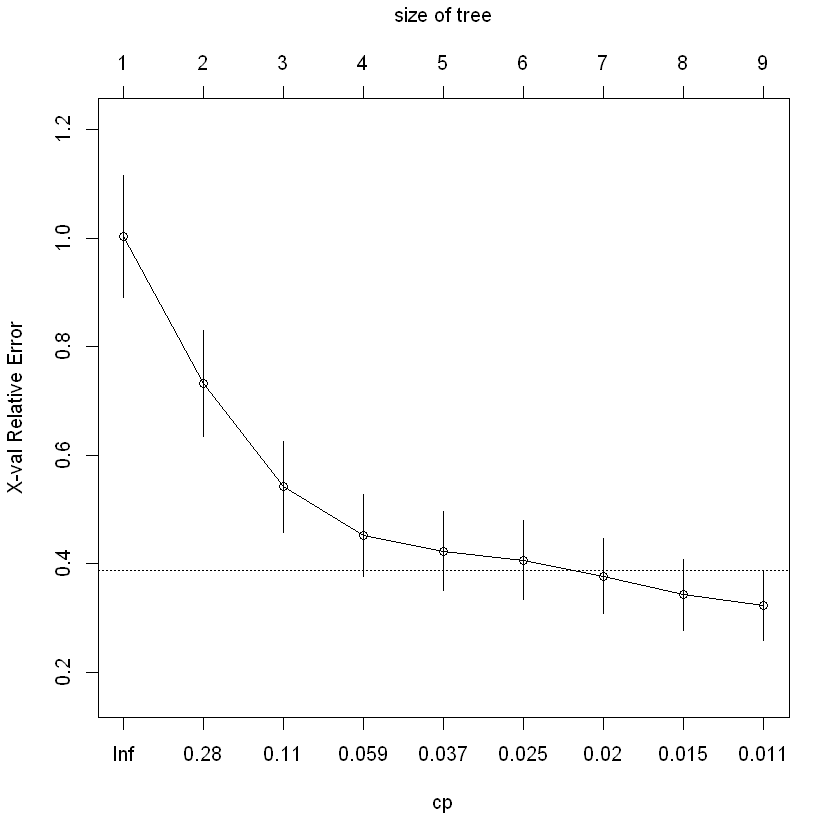

In [27]:
plotcp(cart_boston)

* 가지치기

In [44]:
prune_cart_boston <- rpart(medv ~ ., data=Boston_train,
                           control = rpart.control(cp = 0.016))

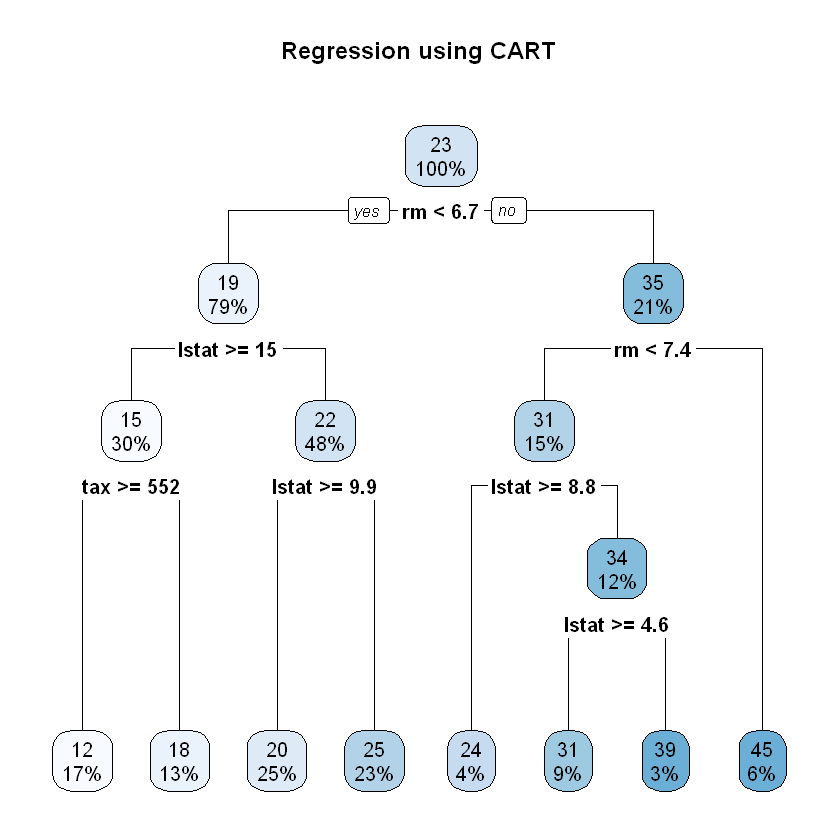

In [45]:
rpart.plot(prune_cart_boston, main = "Regression using CART")

* 예측

In [47]:
yhat <- predict(prune_cart_boston, 
                newdata = Boston_test)

* 가지치기 후 MSE

In [48]:
mean((yhat-Boston_test$medv)^2)  ###MSE

[1] 26.7515

* 가지치기전 MSE

In [49]:
mean((predict(cart_boston, 
              newdata=Boston_test)-Boston_test$medv)^2)  

[1] 25.96568

### bagging

In [52]:
fit.bagg<- ipredbagg(Boston_train$medv, 
                     Boston_train[,-13],
                     nbagg=1000, ## 트리 형성 개수
                     coob=T)  ## oob error estimator를 측정할 것이냐 말거냐

In [53]:
fit.bagg


Bagging regression trees with 1000 bootstrap replications 
Out-of-bag estimate of root mean squared error:  4.2268 


* 예측

In [54]:
pred<-predict(fit.bagg, 
              newdata = Boston_test)
mean((pred-Boston_test$medv)^2)  ###MSE

[1] 17.5009

### Random Forest

In [57]:
rf.boston <- randomForest(medv ~ ., 
                          data = Boston_train,
                          ntree=200, ## 트리개 수
                          mtry = 4,  ## 설명변수 개수
                          importance = TRUE ## 변수 중요도 출력 여부
                         )  

In [58]:
rf.boston


Call:
 randomForest(formula = medv ~ ., data = Boston_train, ntree = 200,      mtry = 4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 4

          Mean of squared residuals: 14.83848
                    % Var explained: 82.71

* % Var explained: 82.71 $\to$ 설명력 정도

In [59]:
yhat.bag <- predict(rf.boston, 
                    newdata = Boston_test)

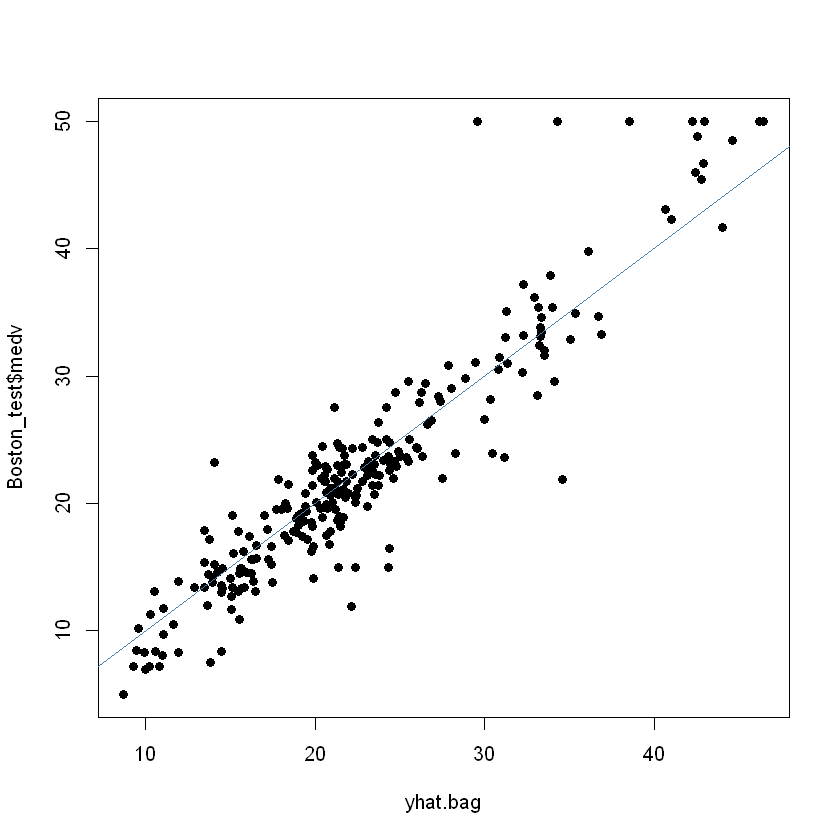

In [60]:
plot(yhat.bag, Boston_test$medv, pch=16)
abline(0, 1, col='steelblue')

* test MSE 계산

In [61]:
mean((yhat.bag - Boston_test$medv)^2)

[1] 11.29729

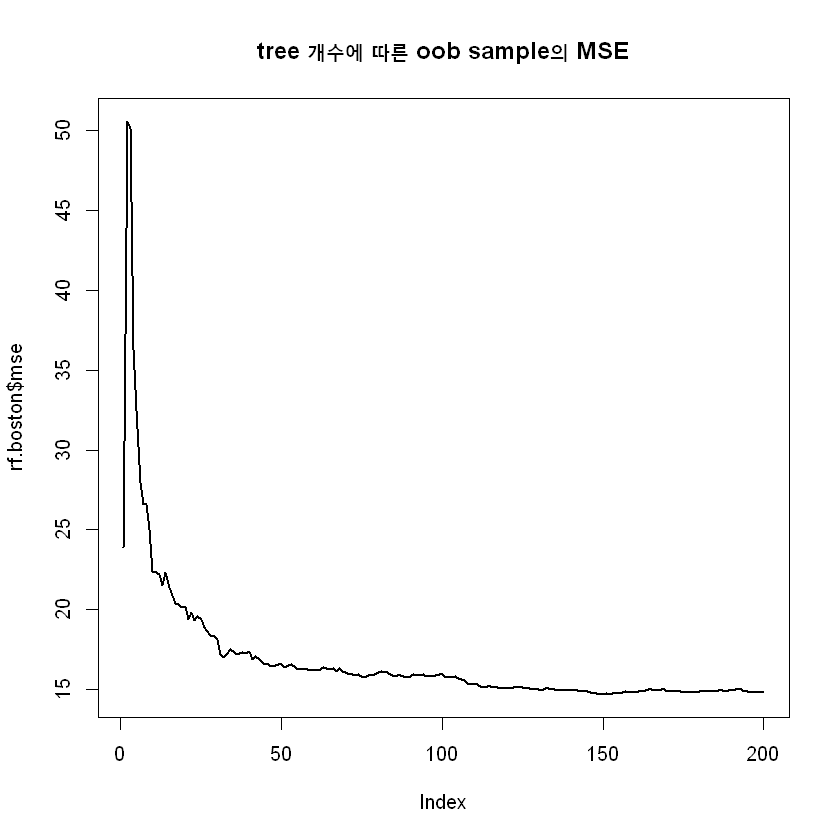

In [66]:
plot(rf.boston$mse, type='l', lwd=2,main="tree 개수에 따른 oob sample의 MSE")

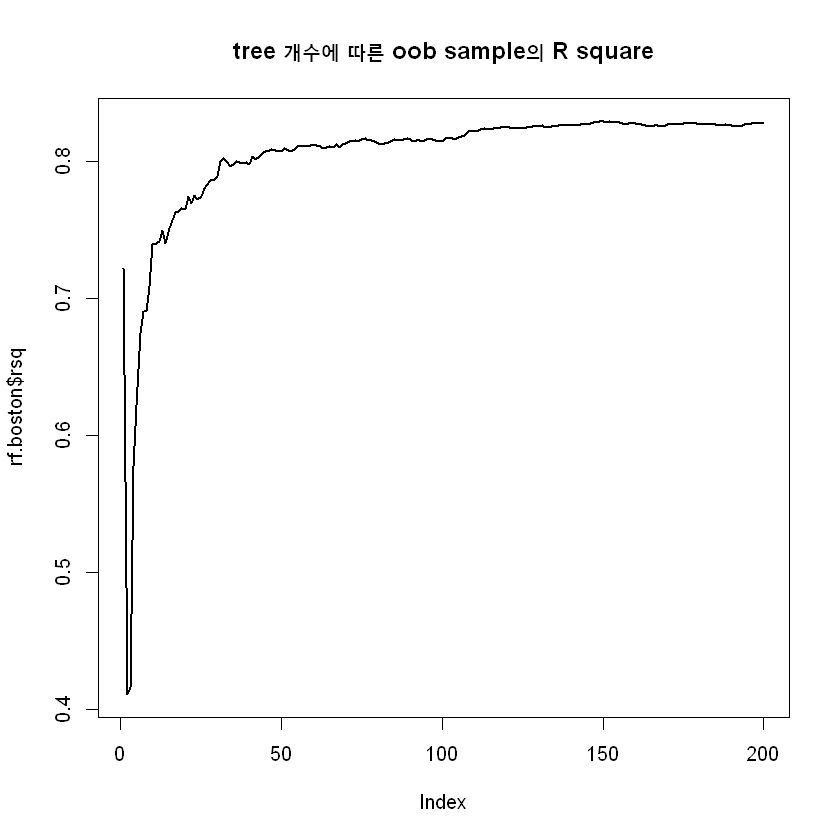

In [67]:
plot(rf.boston$rsq, type='l', lwd=2, main = "tree 개수에 따른 oob sample의 R square")

* IncNodePurity : 해당 노드에서 순수도 증가량 $\to$ 회귀에서는 RSS

* %incMSE : oob sample에 대한 MSE 증가량 

* 두 수치 전부 클수록 중요한 변수

In [68]:
rf.boston$importance

,%IncMSE,IncNodePurity
zn,0.9674468,155.3546
indus,4.3008534,932.0667
chas,2.9736723,372.1183
nox,9.3052974,1879.1228
rm,37.3644011,6638.7398
age,1.7070941,563.9708
dis,8.7043872,1453.4294
rad,1.3373895,191.3632
tax,3.8467383,704.0282
ptratio,5.8036452,1301.5738


In [69]:
rf.boston$importanceSD

zn     indus      chas       nox        rm       age       dis       rad 
0.6943299 0.9861194 0.6948860 1.0697941 2.0729399 0.4687068 0.8851278 0.3885074 
      tax   ptratio     black     lstat 
0.6676405 0.8265511 0.3428223 3.4464005

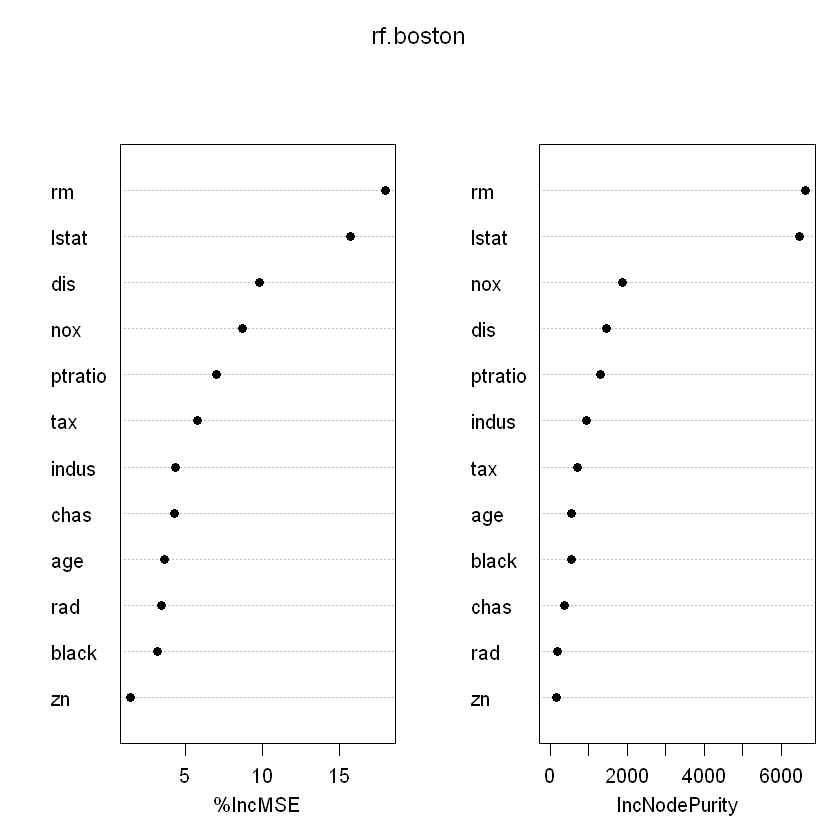

In [71]:
varImpPlot(rf.boston, pch=16)

* oob.times : 200개의 트리 각각에서 선택된 oob sample

In [72]:
rf.boston$oob.times

[1] 75 62 71 70 87 77 78 78 80 82 73 82 71 64 71 83 77 65 65 73 80 66 81 65 59
 [26] 83 76 77 75 85 57 69 67 81 65 68 73 83 80 61 72 64 80 64 63 75 74 68 69 74
 [51] 83 72 75 71 75 75 63 77 91 84 75 61 66 74 72 73 75 64 69 79 78 75 73 76 72
 [76] 68 69 80 66 69 79 80 71 81 85 80 76 70 73 80 68 76 81 61 68 66 59 80 71 77
[101] 75 84 78 59 77 77 62 82 83 72 66 74 72 72 63 74 71 69 73 88 73 77 92 75 71
[126] 81 66 80 79 82 78 71 76 80 67 69 77 86 72 73 62 78 60 71 63 73 66 65 67 77
[151] 65 78 66 73 63 74 61 68 69 58 75 68 69 79 66 73 78 75 82 74 68 74 66 81 74
[176] 63 74 63 70 73 67 63 75 64 74 68 82 68 77 74 67 72 79 67 80 75 68 77 66 75
[201] 79 69 86 68 79 80 80 72 90 76 71 72 68 66 62 79 73 82 87 71 86 79 69 76 80
[226] 75 66 74 68 74 74 63 70 75 70 65 79 71 75 72 67 74 85 65 75 79 66 81 64 70
[251] 78 71 69

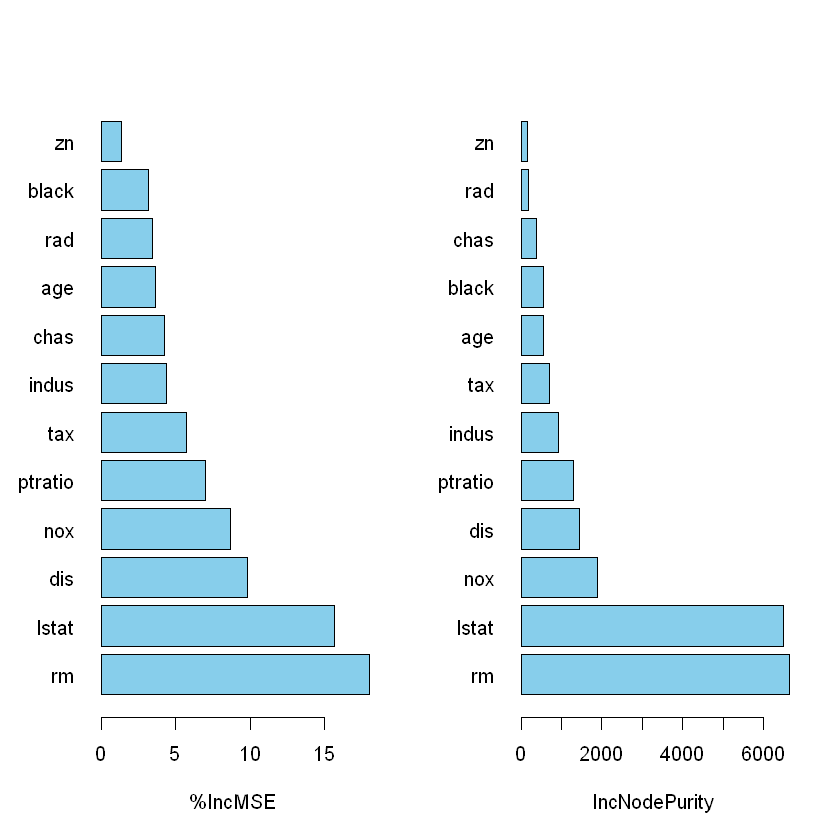

In [73]:
par(mfrow=c(1,2))
barplot(sort(importance(rf.boston)[,"%IncMSE"], decreasing = T), 
        horiz = T,las=1,
        col='skyblue',
        xlab = "%IncMSE")

barplot(sort(importance(rf.boston)[,"IncNodePurity"], decreasing = T), 
        horiz = T,las=1,
        col='skyblue',
        xlab = "IncNodePurity")

* 변수 개수에 따른 mse 산출

In [81]:
bag.boston <- randomForest(medv ~ ., data = Boston_train, 
                           mtry = 13)

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"


In [82]:
rf.boston <- randomForest(medv ~ ., 
                          data = Boston_train,
                          mtry = 4, 
                          xtest=Boston_test[,-13], 
                          ytest=Boston_test$medv)

In [83]:
mtry_rf <- function(m){
  return(randomForest(medv ~ ., 
                      data = Boston_train,
                      mtry = m)$mse)
}

In [84]:
tmp_dt <- data.table( num_tree = 1:500,
                      rf_1 = mtry_rf(1),
                      rf_4 = rf.boston$mse,
                      rf_8 = mtry_rf(8),
                      rf_13 = bag.boston$mse,
                      rf_test = rf.boston$test$mse  ## 변수가 4애일 때 test mse
                    )

In [86]:
melt.tmp <- melt(tmp_dt, id=1)

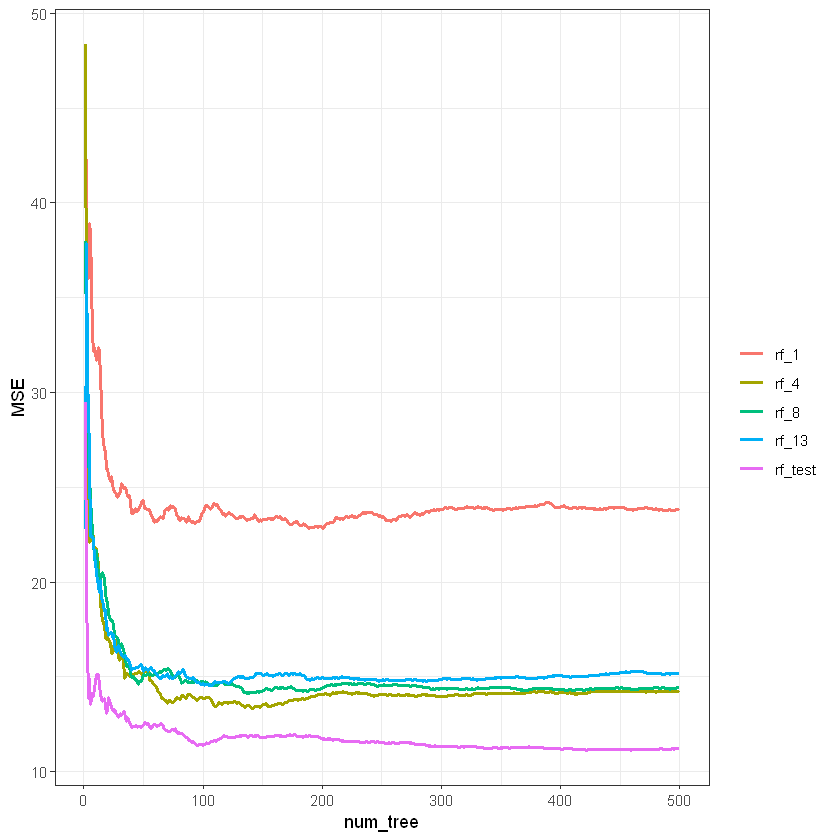

In [87]:
ggplot(melt.tmp, aes(num_tree, value, col=variable)) + 
  geom_line(lwd=1) +
  labs(y='MSE', col="") + theme_bw()

***

### Boosting

In [92]:
boosting_Boston<- gbm(medv~.,
                      data=Boston_train,
                      distribution="gaussian", ##  회귀문제일 경우
                      interaction.depth = 1,  ## tree의 depth
                      n.trees=500)
boosting_Boston

gbm(formula = medv ~ ., distribution = "gaussian", data = Boston_train, 
    n.trees = 500, interaction.depth = 1)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
There were 12 predictors of which 11 had non-zero influence.

* 12 predictors of which 11 had non-zero influence $\to$ 12개의 변수 모두 중요한 변수이다.

* 변수 중요도 출력
    * rel.inf : 상대적 변수 중요도

,var,rel.inf
,<chr>,<dbl>
lstat,lstat,37.2755807
rm,rm,33.6693770
dis,dis,10.0696331
nox,nox,6.0473471
age,age,2.9565208
ptratio,ptratio,2.7893943
black,black,2.6728669
chas,chas,1.8357763
indus,indus,1.1517103


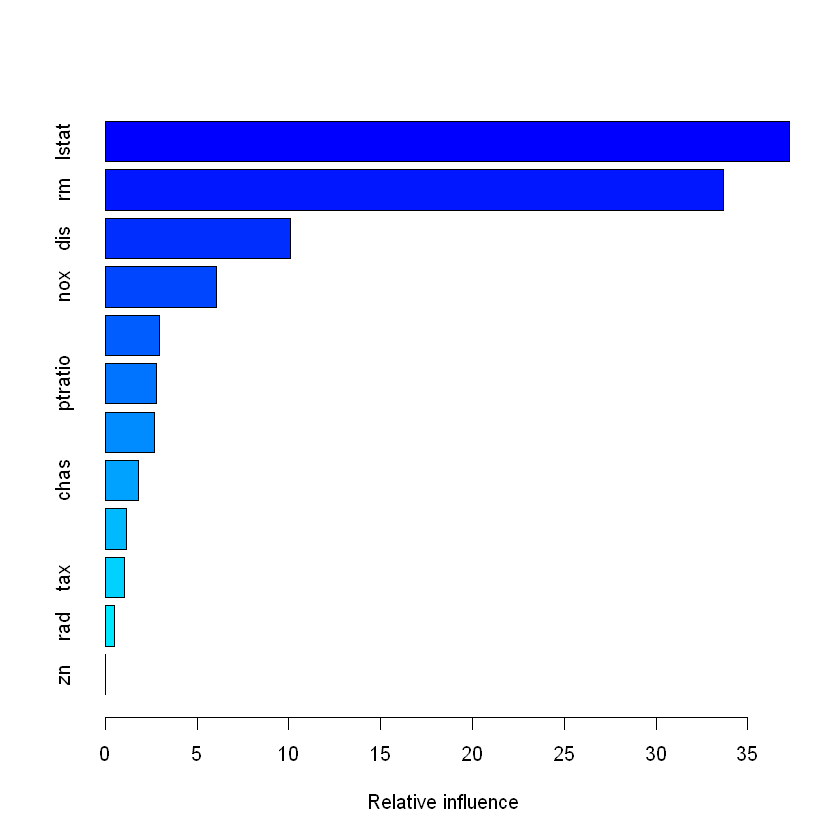

In [94]:
summary(boosting_Boston)

* rm 변수와 y의 관계

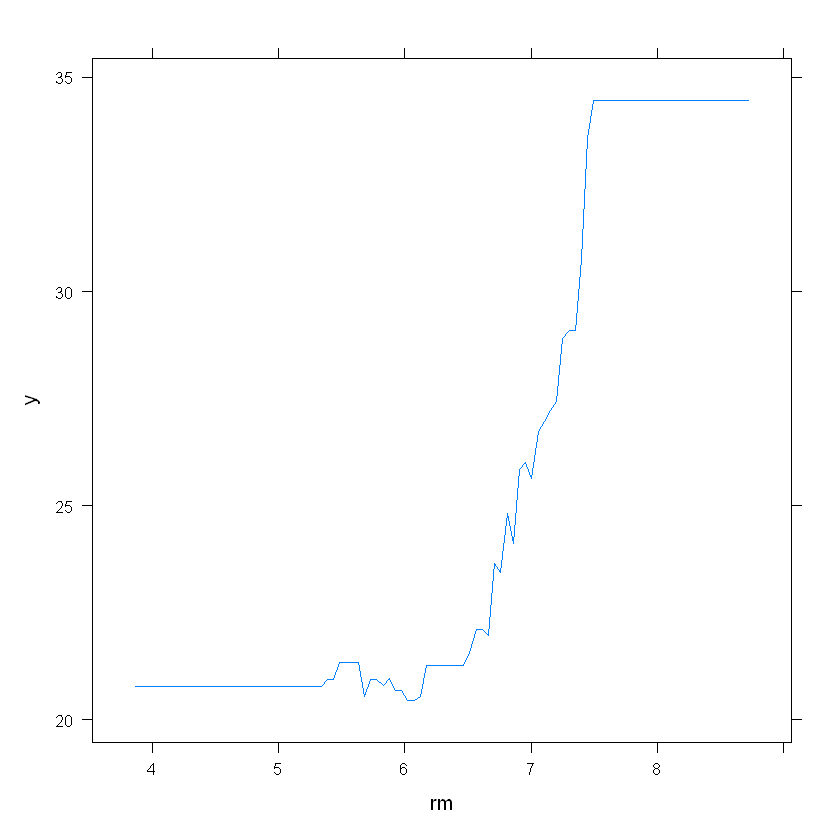

In [95]:
plot(boosting_Boston, i = "rm")

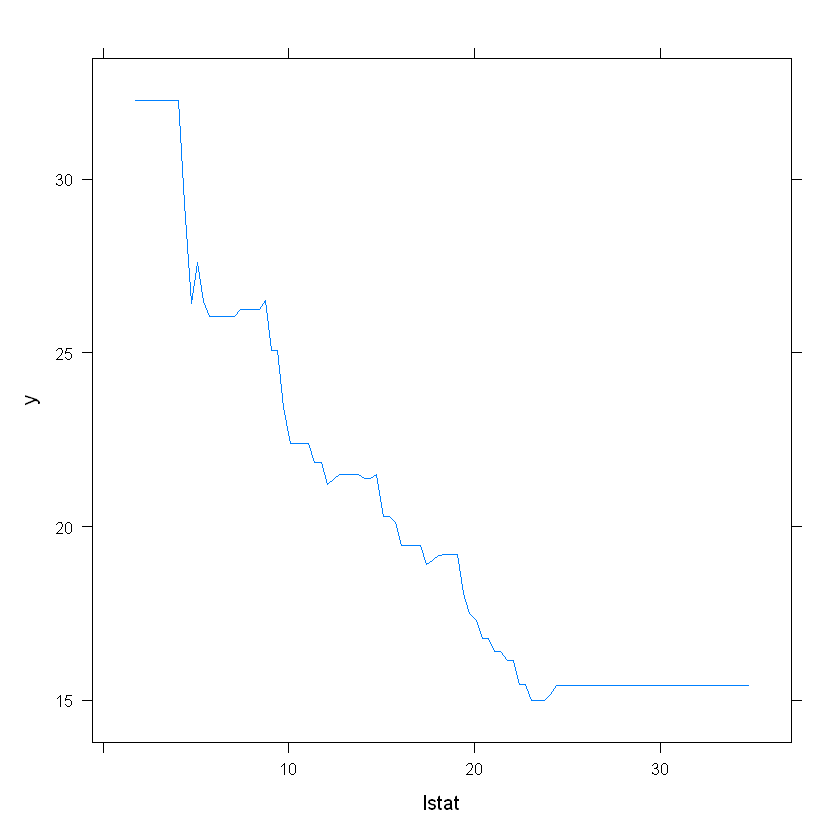

In [96]:
plot(boosting_Boston, i = "lstat")

* 예측

In [97]:
yhat.boost <- predict(boosting_Boston,
                      newdata = Boston_test, n.trees = 500)

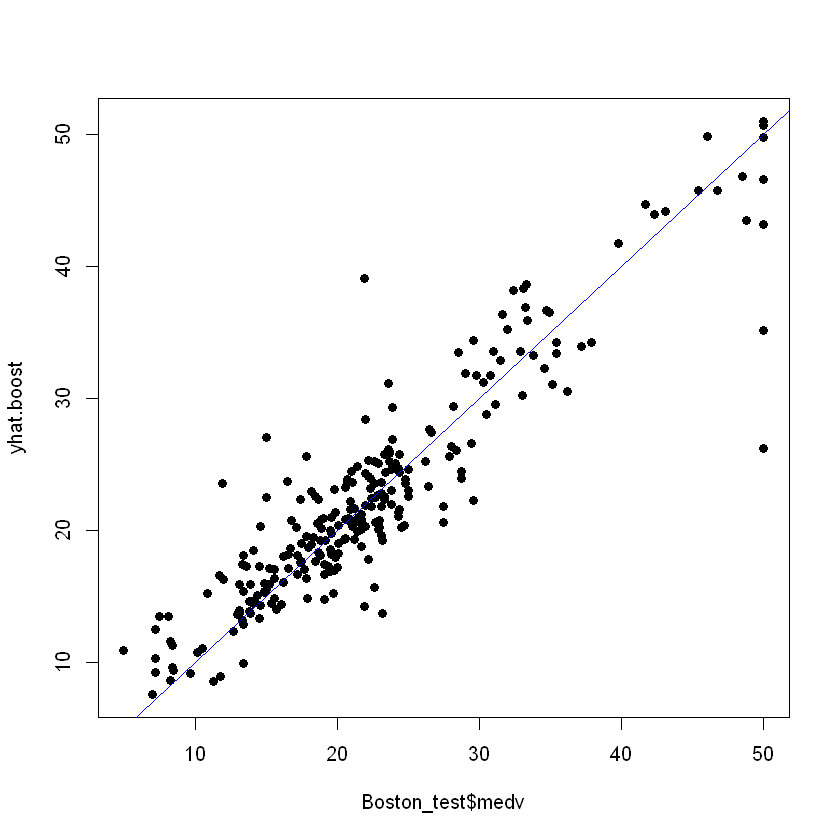

In [98]:
plot(Boston_test$medv, yhat.boost, pch=16)
abline(a=0, b=1, col='blue')

In [99]:
mean((yhat.boost - Boston_test$medv)^2)  ##Test MSE

[1] 13.7156

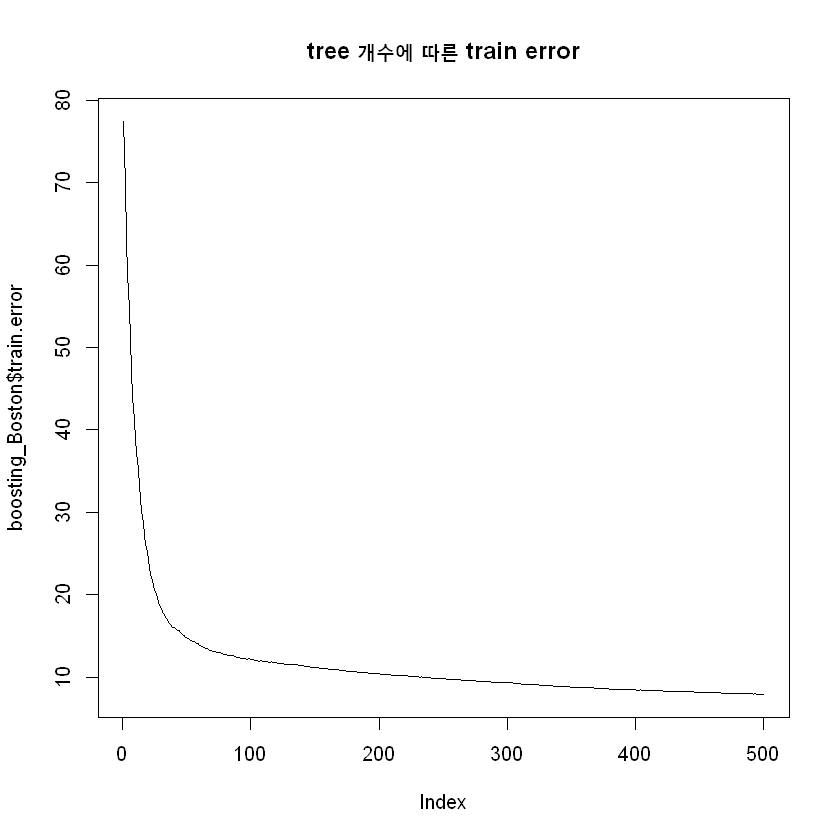

In [102]:
plot(boosting_Boston$train.error, type='l',main = "tree 개수에 따른 train error")

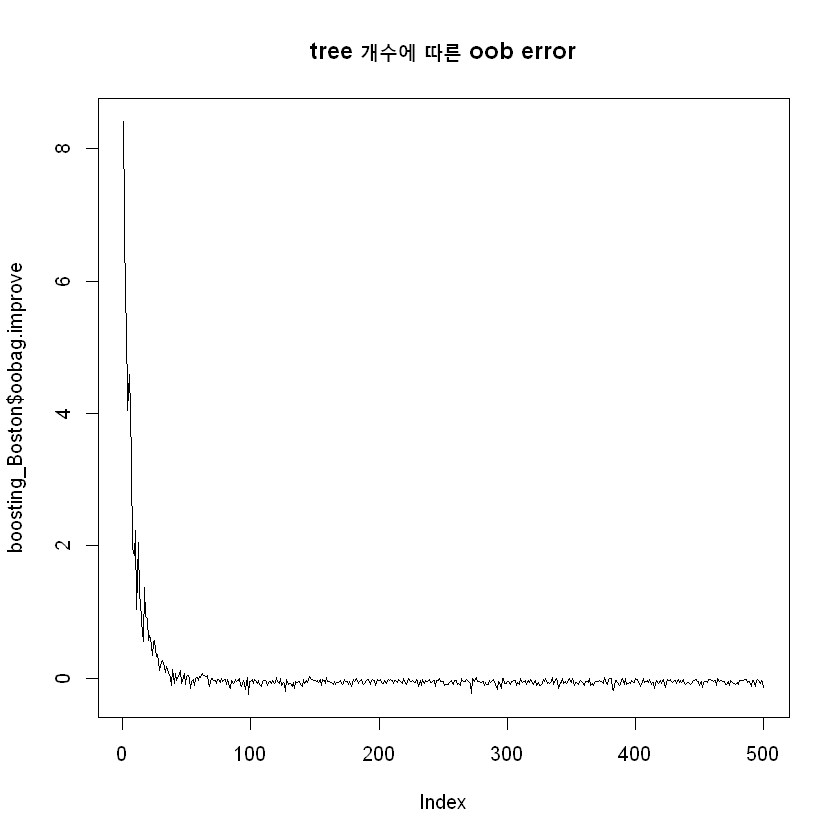

In [103]:
plot(boosting_Boston$oobag.improve,type='l', main= "tree 개수에 따른 oob error")

#### boosting with cv

In [105]:
boosting_Boston<- gbm(medv~.,data=Boston_train,
                      distribution="gaussian",
                      interaction.depth = 4,
                      cv.folds = 10, ## 10-fold
                      n.trees=500)

* 파란색은 cv일 때 optimal 트리

[1] 189

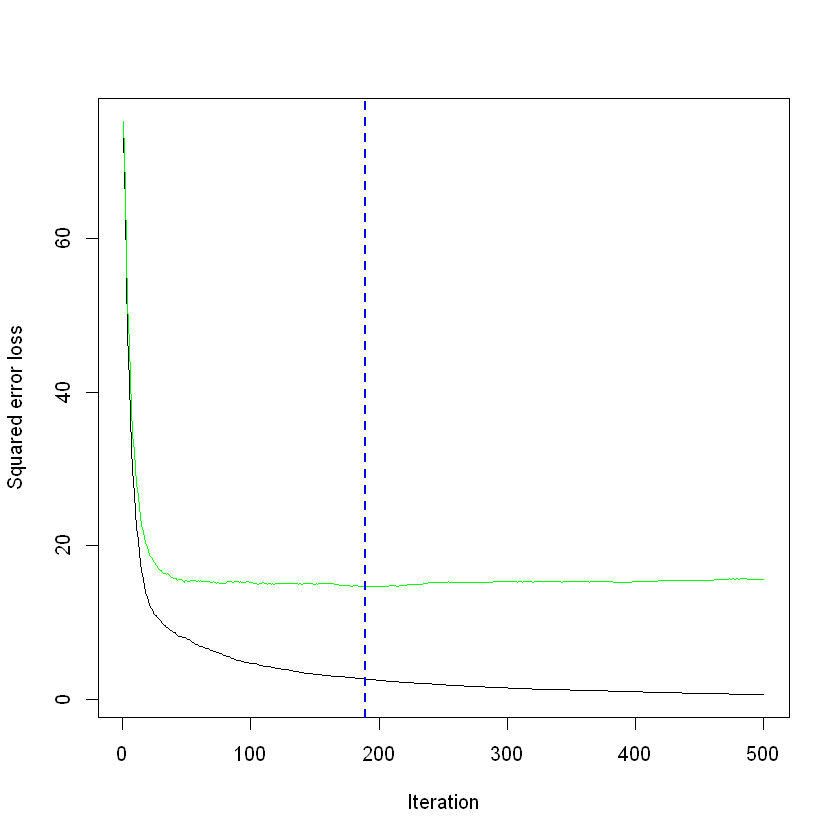

In [106]:
gbm.perf(boosting_Boston, plot.it = TRUE, 
         oobag.curve = F, overlay = TRUE, method='cv')

* oob sample일 때 최적 트리 개수

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 25
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 500 
Equivalent Number of Parameters: 39.85 
Residual Standard Error: 0.1638

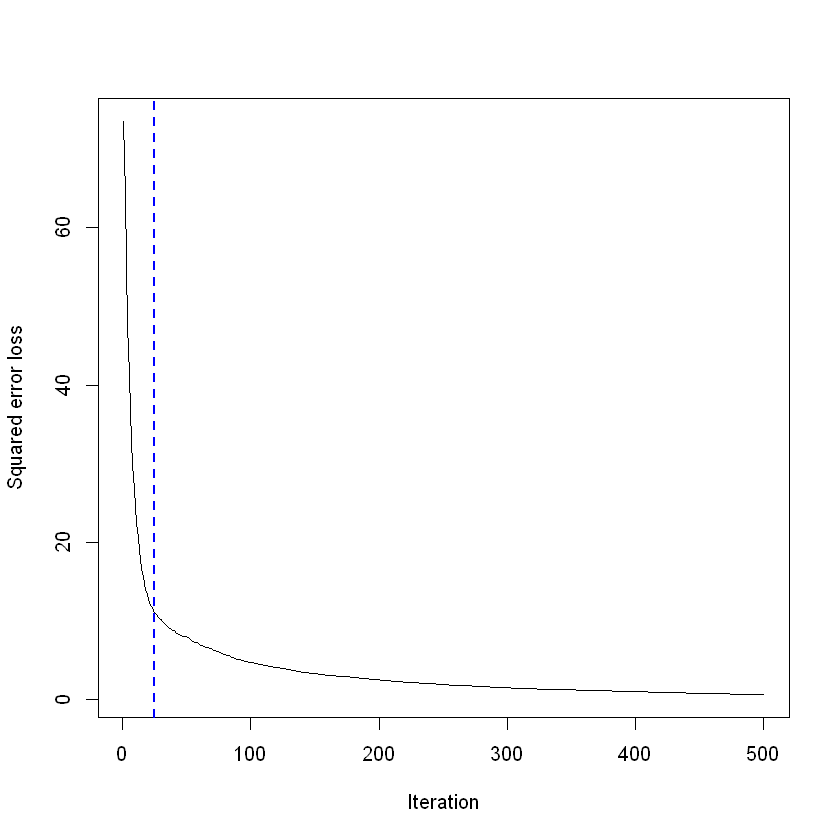

In [108]:
gbm.perf(boosting_Boston, plot.it = TRUE, 
         oobag.curve = F, overlay = TRUE, method='OOB')

* 깊이에 따른 변화관측

In [109]:
Boost_ID <- function(d){
  
  tmp_boost_model <- gbm(medv~.,data=Boston_train,
                         distribution="gaussian",
                         interaction.depth = d,
                         n.trees=100)
  
  return(tmp_boost_model$oobag.improve)
  
}

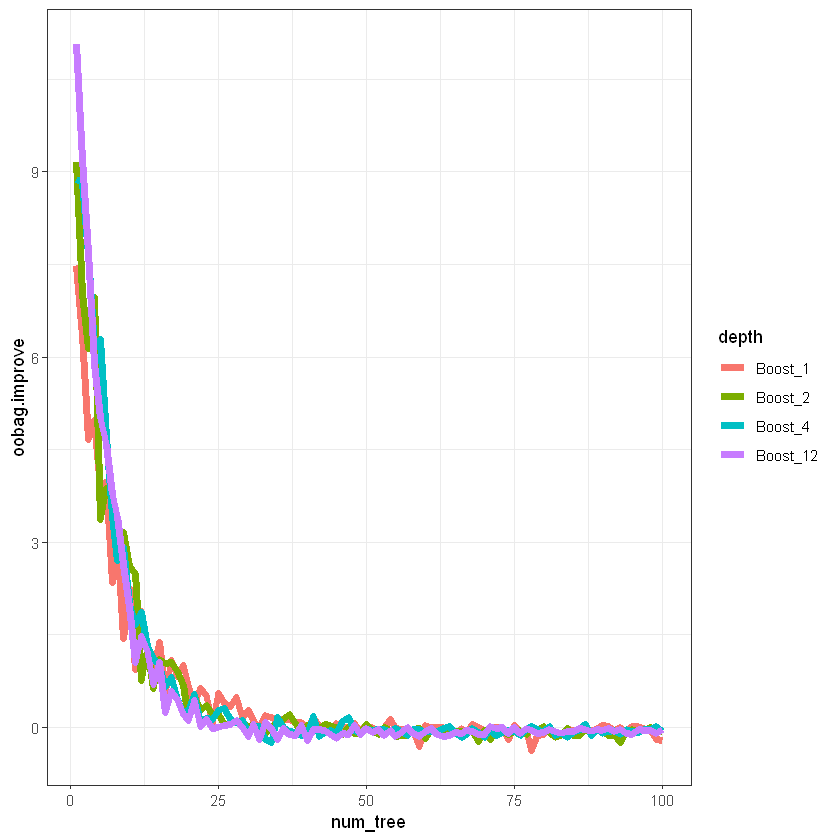

In [110]:
tmp_dt <- data.table( num_tree = 1:100,
                      Boost_1 = Boost_ID(1),
                      Boost_2 = Boost_ID(2),
                      Boost_4 = Boost_ID(4),
                      Boost_12 = Boost_ID(12)
                      )

melt.tmp <- melt(tmp_dt, id=1)

ggplot(melt.tmp, aes(num_tree, value, col=variable)) + 
  geom_line(lwd=2) +
  labs(y='oobag.improve', col="depth")+ theme_bw()

* 결과를 보니 depth의 개수에 따라 변화가 미비하다 즉, depth를 1개만 해도 되겠당

***